In [138]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [139]:
import librosa 
import matplotlib.pyplot as plt
import numpy as np 
import IPython.display as ipd
import os
import glob
import json
import seaborn as sns
import random

In [140]:
audio_dir = '/kaggle/input/environmental-sound-classification-50/audio/audio';
audio16000_dir = '/kaggle/input/environmental-sound-classification-50/'
audio44100_dir = '/kaggle/input/environmental-sound-classification-50/'
sample_audio = '/kaggle/input/environmental-sound-classification-50/audio/audio/1-100210-A-36.wav'
# os.path.join(audio_dir, filename)

In [141]:
c = 0
if os.path.exists(audio_dir):
    for element in os.listdir(audio_dir):
        c+=1
c

2002

In [142]:
paths = []
labels = []
c = 0
# for dirname, _, filenames in os.walk('/kaggle/input/environmental-sound-classification-50'):
#     for filename in filenames:
#         c+=1
#         if(c>=5):
#             paths.append(os.path.join(dirname, filename))
#             label = filename.split('-')[-1]
#             label = label.split('.')[0]
#             labels.append(label)

# print(len(labels))

In [143]:
# labels

In [144]:
csv_labels = pd.read_csv('/kaggle/input/environmental-sound-classification-50/esc50.csv')
print(csv_labels.head())

            filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A


In [145]:
csv_labels = csv_labels.drop(['fold','esc10','src_file','take'], axis=1)

In [146]:
csv_labels.head()

,filename,target,category
0,1-100032-A-0.wav,0,dog
1,1-100038-A-14.wav,14,chirping_birds
2,1-100210-A-36.wav,36,vacuum_cleaner
3,1-100210-B-36.wav,36,vacuum_cleaner
4,1-101296-A-19.wav,19,thunderstorm


<Axes: xlabel='category', ylabel='count'>

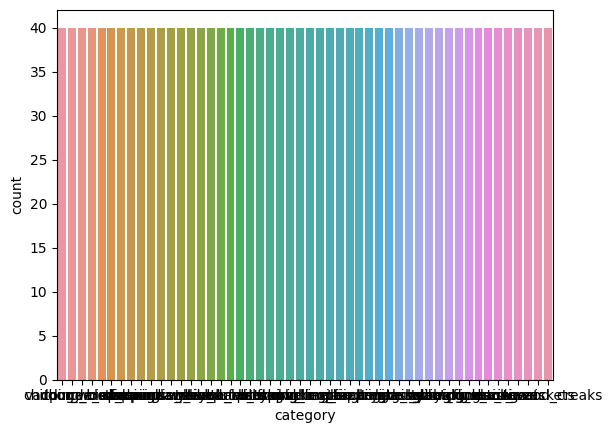

In [147]:
sns.countplot(x=csv_labels["category"]) 

In [148]:
len(csv_labels['category'].unique())

50

In [149]:
csv_labels['category'].value_counts()

category
dog                 40
chirping_birds      40
vacuum_cleaner      40
thunderstorm        40
door_wood_knock     40
can_opening         40
crow                40
clapping            40
fireworks           40
chainsaw            40
airplane            40
mouse_click         40
pouring_water       40
train               40
sheep               40
water_drops         40
church_bells        40
clock_alarm         40
keyboard_typing     40
wind                40
footsteps           40
frog                40
cow                 40
brushing_teeth      40
car_horn            40
crackling_fire      40
helicopter          40
drinking_sipping    40
rain                40
insects             40
laughing            40
hen                 40
engine              40
breathing           40
crying_baby         40
hand_saw            40
coughing            40
glass_breaking      40
snoring             40
toilet_flush        40
pig                 40
washing_machine     40
clock_tick          40
sn

In [150]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [151]:
def spectrogram(audio_file):
    y, sr = librosa.load(audio_file)

    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    # Plot the spectrogram
#     fig, ax = plt.subplots()
    librosa.display.specshow(spectrogram_db, sr=sr)

    plt.savefig('spectrogram.png')
    image = cv2.imread('spectrogram.png',0)
    left_crop = 100
    right_crop = 80
    top_crop = 57
    bottom_crop = 60

    # Crop the sides of the image
    image = image[top_crop:-bottom_crop, left_crop:-right_crop]
#     plt.imshow(image)
#     plt.show()
    image = image.astype('float32') / 255.0   # Normalize pixel values
    
    return image



array([[0.94509804, 0.94509804, 0.94509804, ..., 0.94509804, 0.94509804,
        0.94509804],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19607843, 0.19215687, 0.19215687, ..., 0.        , 0.02352941,
        0.02352941],
       ...,
       [0.3882353 , 0.3647059 , 0.3647059 , ..., 0.28235295, 0.3019608 ,
        0.3019608 ],
       [0.3882353 , 0.3647059 , 0.3647059 , ..., 0.28235295, 0.3019608 ,
        0.3019608 ],
       [0.29803923, 0.29803923, 0.29803923, ..., 0.34117648, 0.3254902 ,
        0.3254902 ]], dtype=float32)

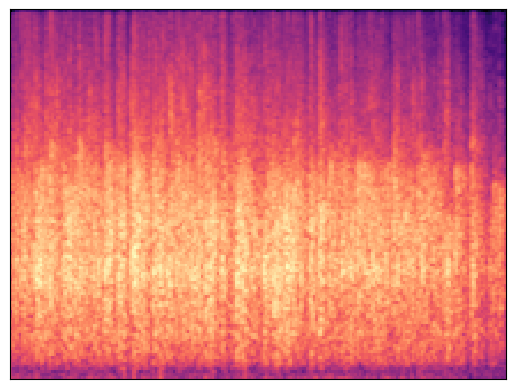

In [152]:
spectrogram('/kaggle/input/environmental-sound-classification-50/audio/audio/1-105224-A-22.wav')

In [ ]:
features = []
labels = []
index = []
c = 0;

for i in csv_labels['filename']:
    path_audio = os.path.join(audio_dir,i)
    image = spectrogram(path_audio)
    features.append(image)
    labels.append(csv_labels['category'][c])
    index.append(csv_labels['target'][c])
    c += 1;
    print("no. of completed images: ",c);
print(index[0],labels[0],c)

no. of completed images:  1
no. of completed images:  2
no. of completed images:  3
no. of completed images:  4
no. of completed images:  5
no. of completed images:  6
no. of completed images:  7
no. of completed images:  8
no. of completed images:  9
no. of completed images:  10
no. of completed images:  11
no. of completed images:  12
no. of completed images:  13
no. of completed images:  14
no. of completed images:  15
no. of completed images:  16
no. of completed images:  17
no. of completed images:  18
no. of completed images:  19
no. of completed images:  20
no. of completed images:  21
no. of completed images:  22
no. of completed images:  23
no. of completed images:  24
no. of completed images:  25
no. of completed images:  26
no. of completed images:  27
no. of completed images:  28
no. of completed images:  29
no. of completed images:  30
no. of completed images:  31
no. of completed images:  32
no. of completed images:  33
no. of completed images:  34
no. of completed images

In [ ]:
# def preprocess(img_path):
#     image = cv2.imread(image_path)
#     image = cv2.resize(image)
#     return image.flatten()  # Flatten to a 1D array

In [ ]:
index = np.array(index)
features = np.array(features)
labels = np.array(labels)

In [ ]:
print(index.shape,labels.shape,features.shape)

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

Y = labels
X = features

le = LabelEncoder()
labels = le.fit_transform(Y)
labels

In [ ]:
from sklearn.model_selection import train_test_split

Y = tf.one_hot(labels, depth = 50)

X = np.array(features)
Y = np.array(Y)

Xtrain,Xvalid,Ytrain,Yvalid = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xvalid = scaler.fit_transform(Xvalid)
Xtrain

In [ ]:
Xtrain.shape

**L2 REGULARISATION: DID'NT HELP**

In [ ]:
# model = models.Sequential([
#     layers.Dense(64, activation='relu', input_shape=(40,), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#     layers.Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#     layers.Dense(50, activation='softmax')  
# ])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Making a CNN Architechture to train my model

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(480,640)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(50, activation='softmax')) 

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(Xtrain, Ytrain, epochs=50, batch_size=32, validation_data=(Xvalid, Yvalid))

# Evaluate the model on training data
loss, accuracy = model.evaluate(Xtrain, Ytrain)
print("Training Accuracy:", accuracy)


In [ ]:
# print("Labels Completed"

In [ ]:
import matplotlib.pyplot as plt
results = model.evaluate(Xtrain, Ytrain)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history['loss'], label="Training Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()